In [1]:
import numpy as np
from pyphotomol import (
    MPAnalyzer,
    plot_histogram, 
    plot_histograms_and_fits,
    AxisConfig,
    LayoutConfig,
    LegendConfig,
    PlotConfig
)

from scripts import display_figure_static # Only for static display, to be shown in GitHub

In [2]:
file = '../test_files/demo.h5'
mp = MPAnalyzer()

files = [file] * 4
names = [f'demo{i+1}' for i in range(4)]

mp.import_files(files, names=names)

# Artificially count each mass two times for the first file
mp.models['demo1'].masses = np.repeat(mp.models['demo1'].masses, 2)

mp.apply_to_all('count_binding_events')
# Create the histogram - same window and bin width for all files
mp.apply_to_all('create_histogram',use_masses=True, window=[0, 800], bin_width=10)

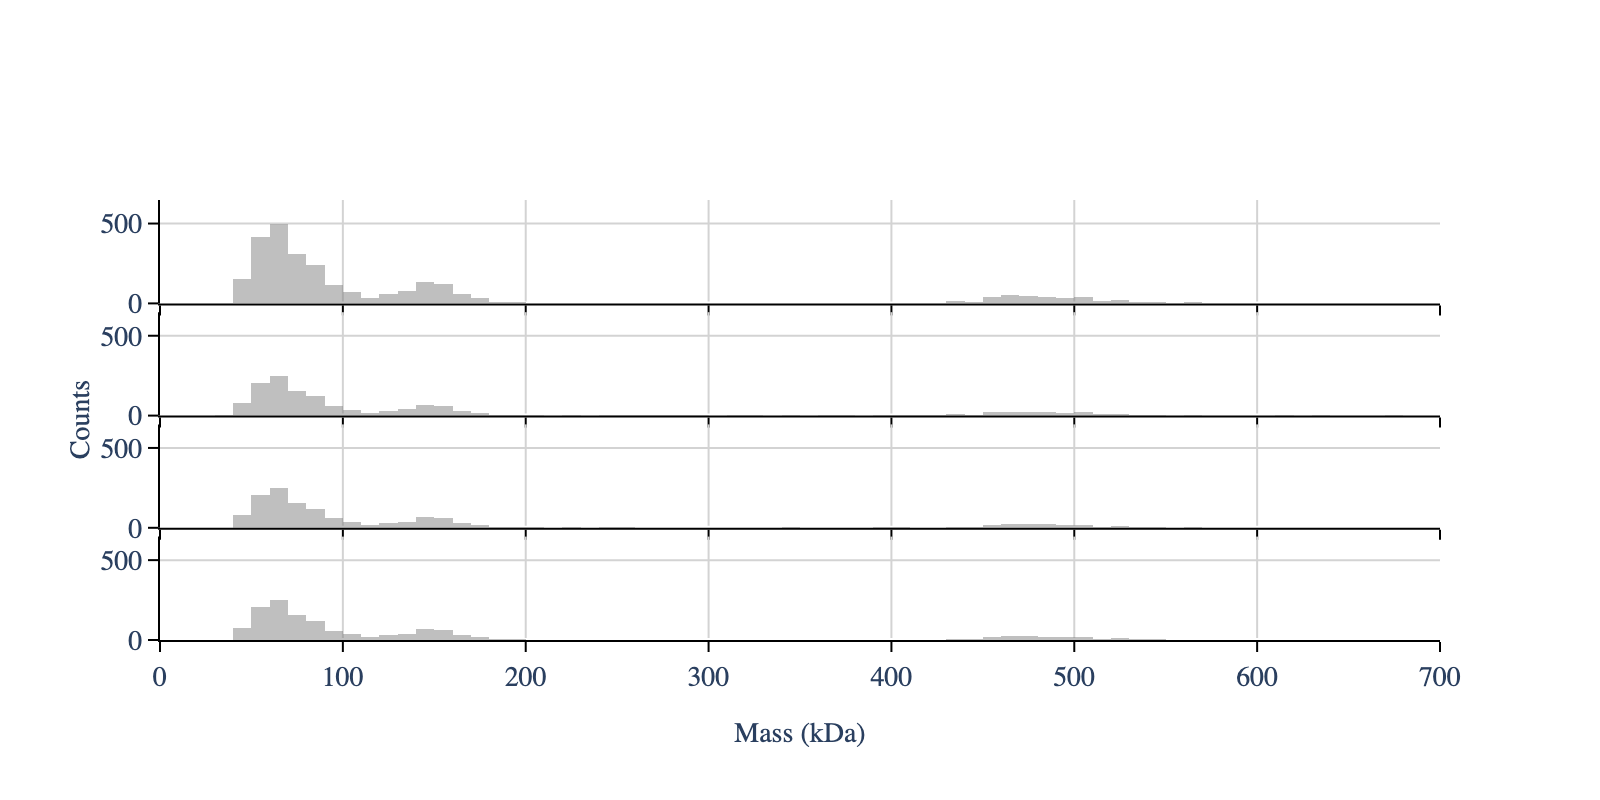

In [3]:
# Plot the mass distribution
colors = ['gray'] * len(files)

# Create configuration objects for customized plotting
layout_config = LayoutConfig(
    stacked=True,  # One plot per file
    show_subplot_titles=False,  # Hide subplot titles
    vertical_spacing=0.02,  # Vertical spacing between subplots
    shared_yaxes=True  # Share y-axes across subplots
)

plot_config = PlotConfig(
    x_range = [0,700]
)

fig = plot_histogram(mp,  # PhotoMol analyzer instance
                     colors,  # colors for each histogram
                     layout_config=layout_config,
                     plot_config=plot_config)

display_figure_static(fig, height=400)
# Replace line above with fig.show() to display the figure interactively

To overlap all histograms - set 'stacked' to False.
In this case we only see one histogram, because all have the same data

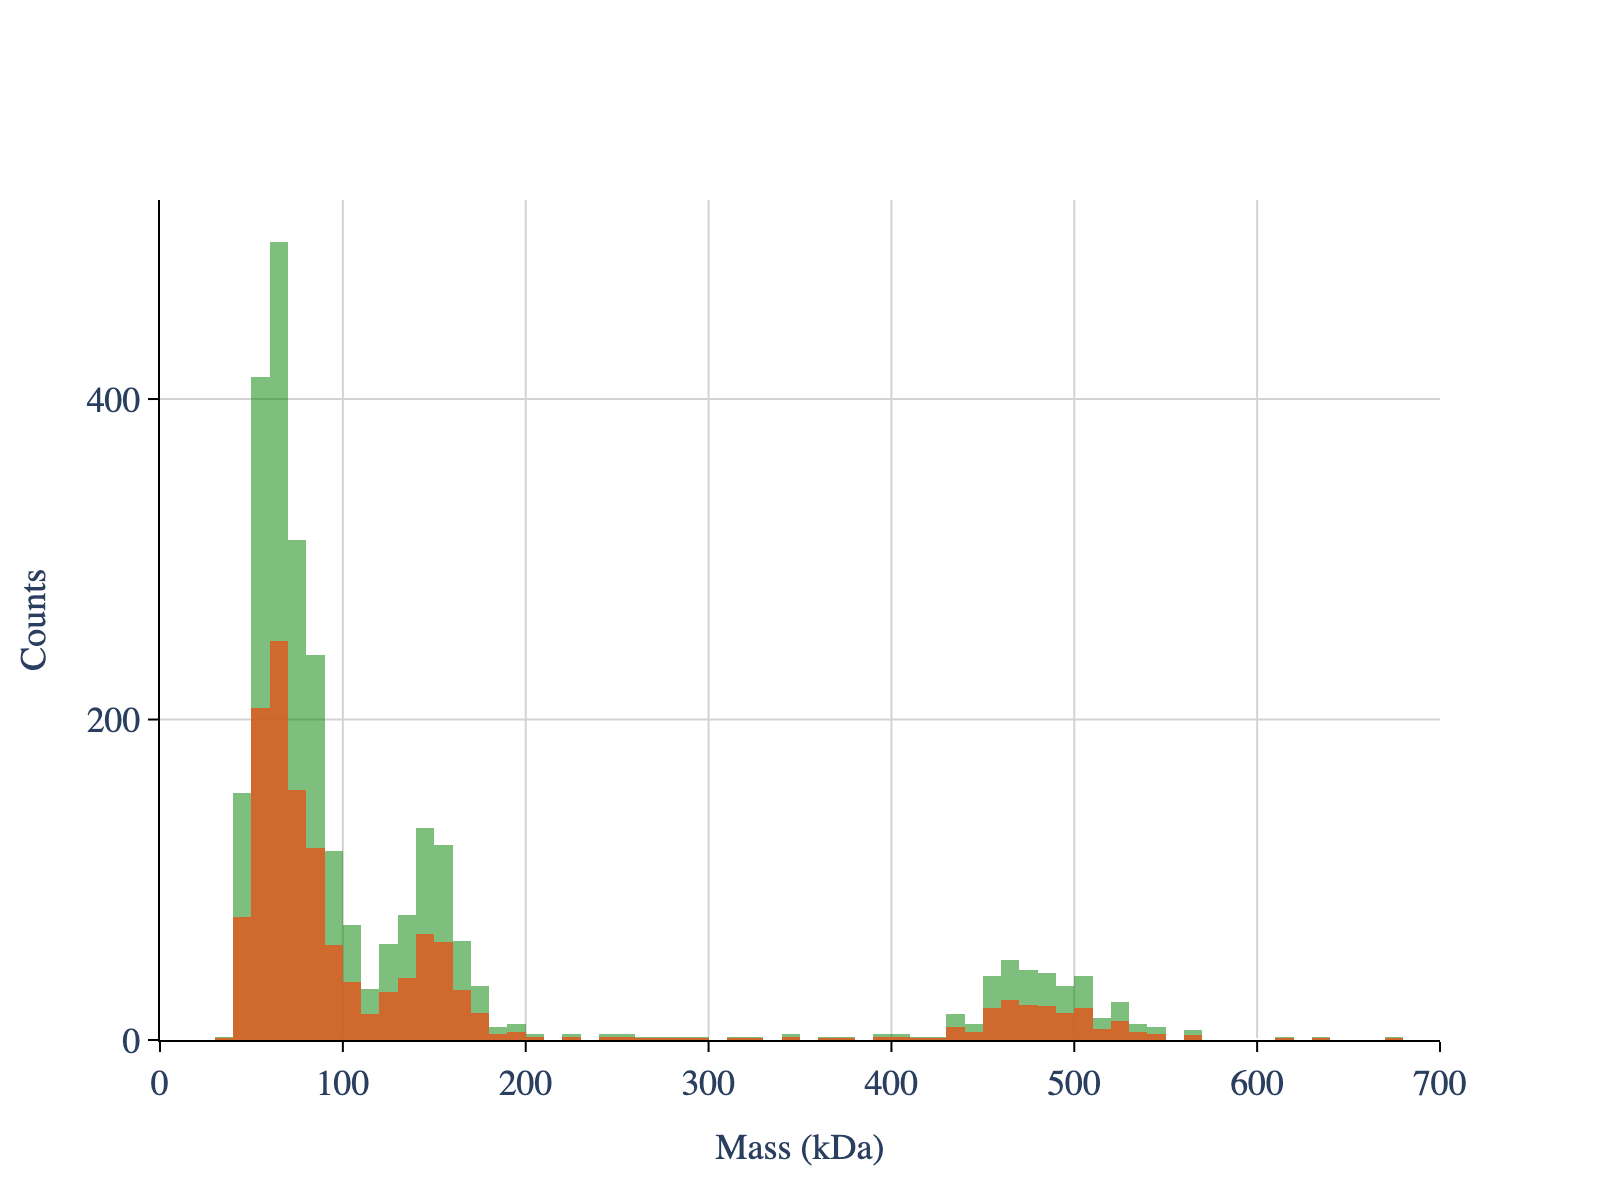

In [4]:
colors = ['green', 'blue', 'red', 'orange']

# Create configuration objects
plot_config = PlotConfig(
    font_size=18,
    x_range=[0, 700]
)

layout_config = LayoutConfig(
    stacked=False,  # One plot for all files
    vertical_spacing=0.01
)

fig = plot_histogram(mp,
                     colors,
                     plot_config=plot_config,
                     layout_config=layout_config)

display_figure_static(fig)

To normalise the histogram, set 'normalize' to True.
To remove the grids, set 'showgrid_x' and 'showgrid_y' to False

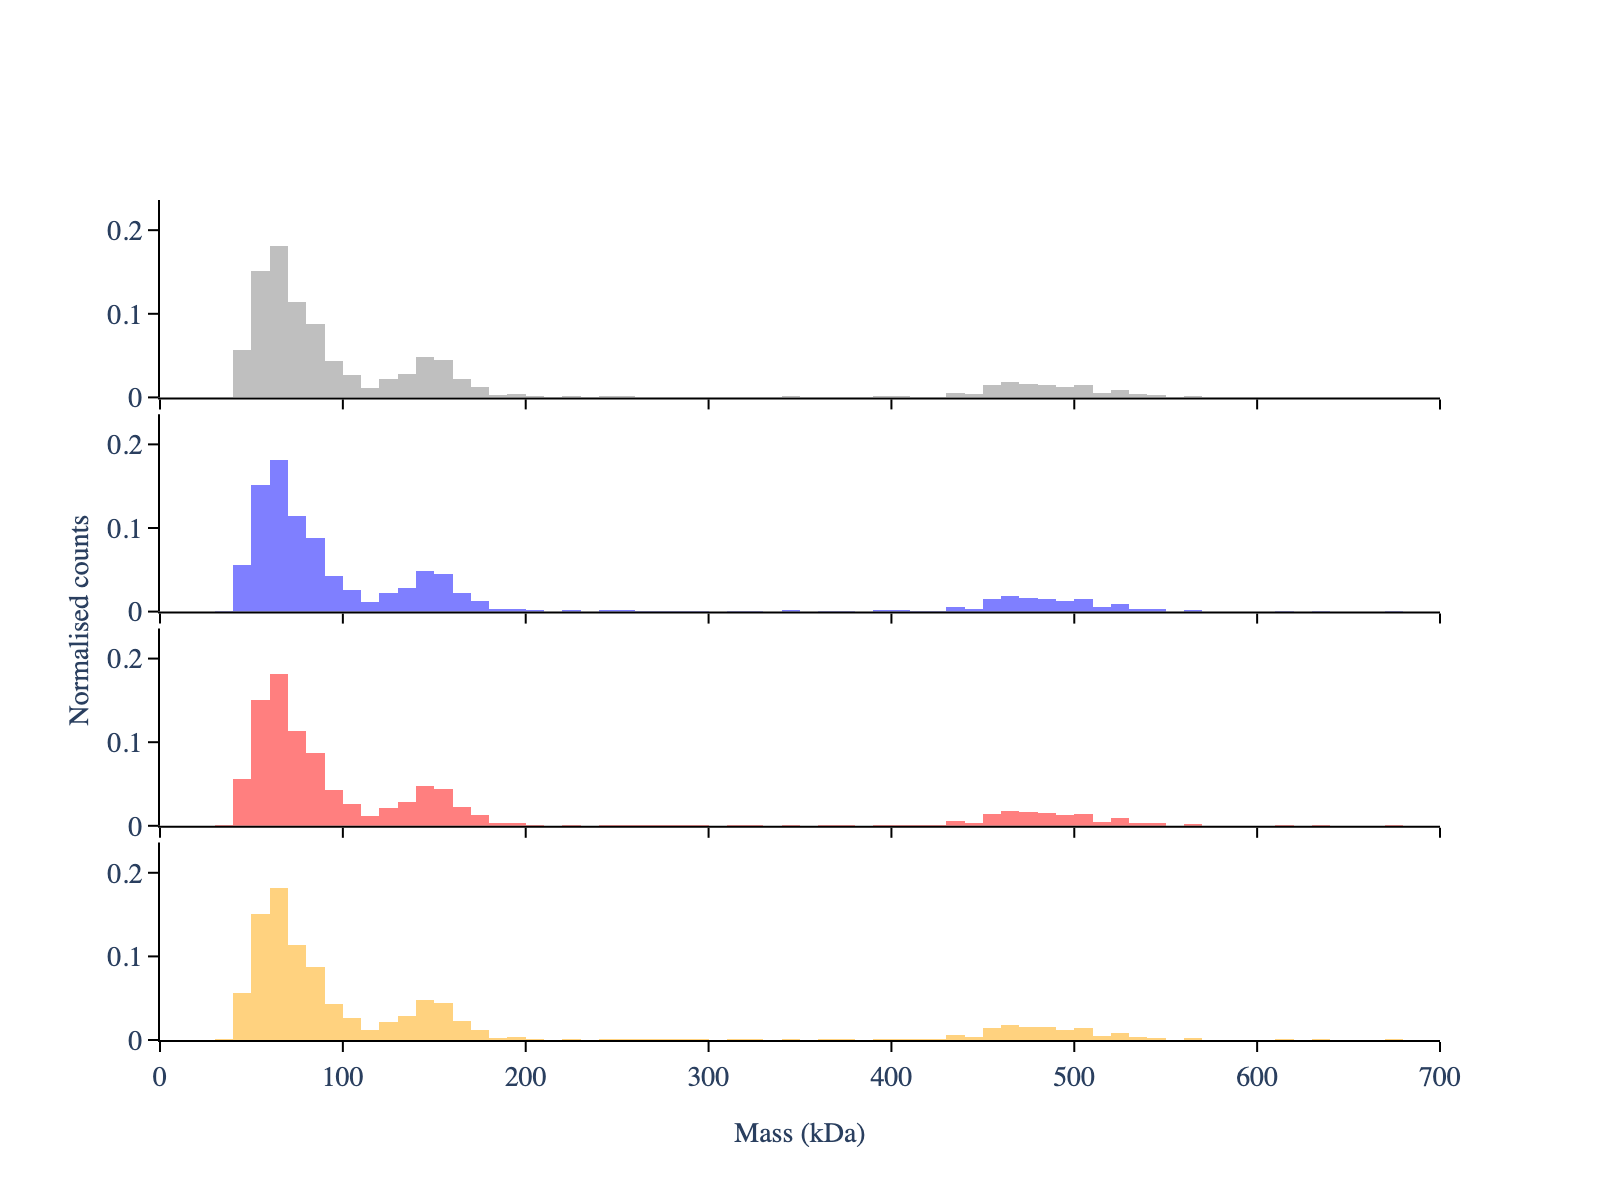

In [5]:
colors = ['gray', 'blue', 'red', 'orange']

# Create configuration objects
plot_config = PlotConfig(
    normalize=True,
    x_range=[0, 700]
)

axis_config = AxisConfig(
    showgrid_x=False,  # Hide x-axis grid lines
    showgrid_y=False   # Hide y-axis grid lines
)
layout_config = LayoutConfig(
    stacked=True,
    vertical_spacing=0.02,
    extra_padding_y_label=0.02
)

fig = plot_histogram(mp,
                     colors,
                     plot_config=plot_config,
                     axis_config=axis_config,
                     layout_config=layout_config)

display_figure_static(fig)

To control the font size, use the argument 'font_size'

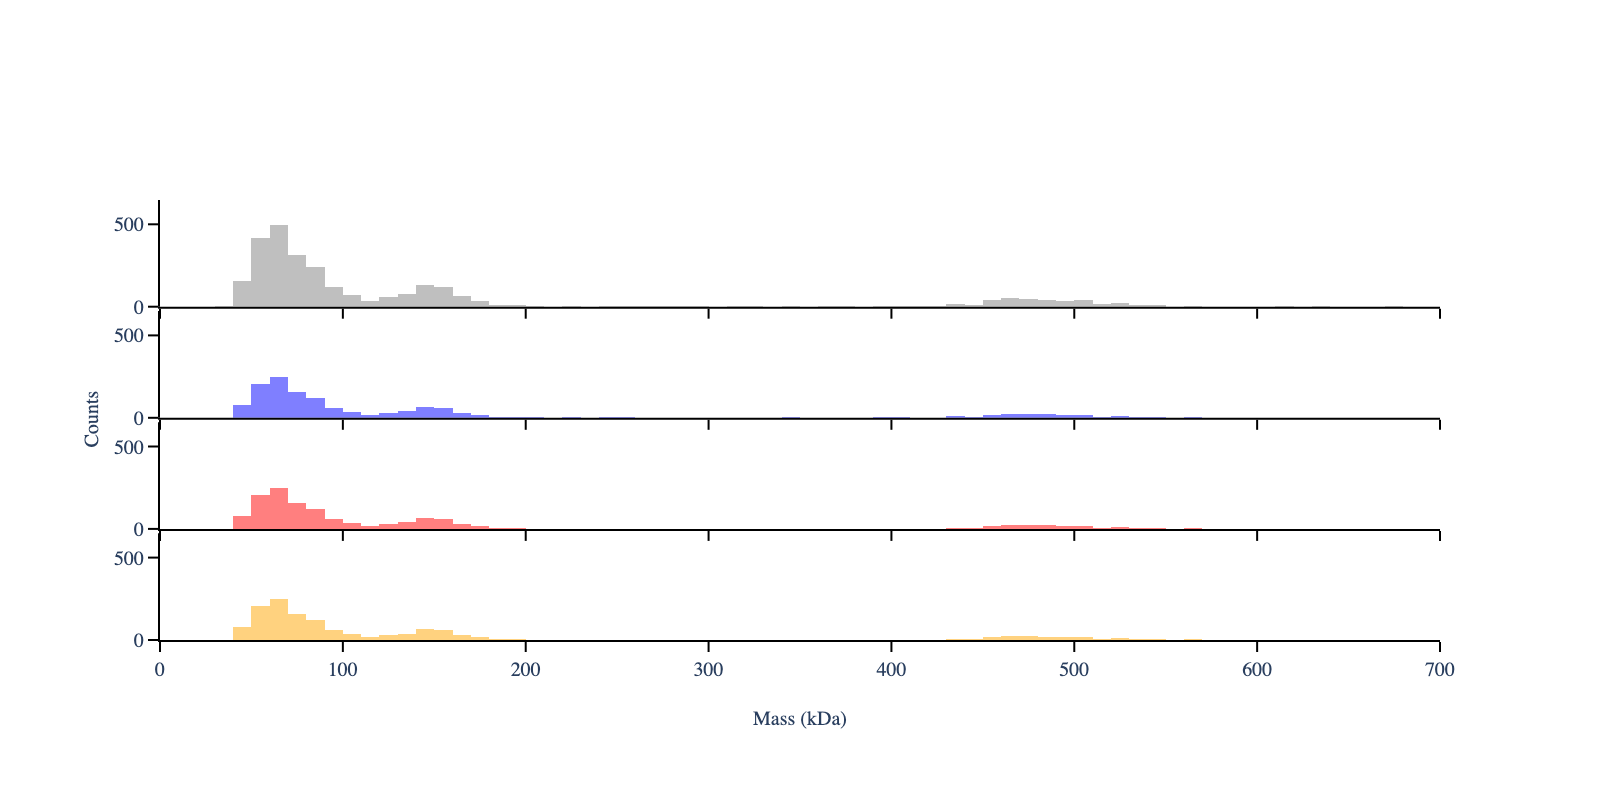

In [6]:
# Create configuration objects
plot_config = PlotConfig(
    normalize=False,
    font_size=10,
    x_range=[0, 700]  # Set x-axis range
)
axis_config = AxisConfig(
    showgrid_x=False,
    showgrid_y=False
)
layout_config = LayoutConfig(
    stacked=True,
    vertical_spacing=0.01
)

fig = plot_histogram(mp, 
                     colors,
                     plot_config=plot_config,
                     axis_config=axis_config,
                     layout_config=layout_config)

display_figure_static(fig, width=800, height=400)

Apply the fitting

In [7]:
# Estimate the peak positions - only to use later as a guess for the fit
# It uses scipy's find_peaks function under the hood
mp.apply_to_all('guess_peaks',min_height=10, min_distance=4, prominence=4)

# Extract the peaks positions
mp.get_properties('peaks_guess')

[array([ 65., 145., 465., 505.]),
 array([ 65., 145., 465.]),
 array([ 65., 145., 465.]),
 array([ 65., 145., 465.])]

In [8]:
# Fit the mass distribution using a multi gaussian 
mp.apply_to_all(method_name='fit_histogram',
                peaks_guess=[65,145,465], # Initial peak guess, same for both files
                mean_tolerance=100, # Tolerance for the mean of the gaussian
                std_tolerance=100, # Tolerance for the standard deviation of the gaussian
                threshold=40, # Minimum observed value for the massses
                baseline=0) # Baseline value for the fit

In [9]:
# Automatic generation of colors and legends for the histograms
legends_df, hist_df = mp.create_plotting_config(repeat_colors=False)

print(legends_df)
print('')
print(hist_df)

# Legends is the label, color is the color for the fitted lines and select is a boolean to
# control whether the trace is shown. show legend controls if the selected traces is also
# displayed in the legends text

             legends    color  select  show_legend
0   Gaussian sum (1)  #8DD3C7    True         True
1            Peak #1  #ADDFC1    True         True
2            Peak #2  #CDEBBB    True         True
3            Peak #3  #EDF8B6    True         True
4   Gaussian sum (2)  #F6F6B8    True         True
5            Peak #4  #E4E2C3    True         True
6            Peak #5  #D2CFCE    True         True
7            Peak #6  #BFBBD9    True         True
8   Gaussian sum (3)  #CDABBF    True         True
9            Peak #7  #DE9AA2    True         True
10           Peak #8  #F08A84    True         True
11           Peak #9  #EE857B    True         True
12  Gaussian sum (4)  #CB9297    True         True
13          Peak #10  #A9A0B2    True         True
14          Peak #11  #86AECE    True         True
15          Peak #12  #9CB1B8    True         True

  legends    color
0   demo1  #AEC6CF
1   demo2  #FFB347
2   demo3  #77DD77
3   demo4  #CFCFC4


To use always the same colors per histogram for the fitted curves, set 'repeat_colors' to True

In [10]:
# Automatic generation of colors and legends for the histograms
legends_df, hist_df = mp.create_plotting_config(repeat_colors=True)

# Change same legends
legends_df.loc[1, 'legends'] = 'Molecule A'
legends_df.loc[2, 'legends'] = 'Molecule B'
legends_df.loc[3, 'legends'] = 'Molecule C'

print(legends_df)

             legends    color  select  show_legend
0   Gaussian sum (1)  #808080    True         True
1         Molecule A  #E41A1C    True         True
2         Molecule B  #377EB8    True         True
3         Molecule C  #4DAF4A    True         True
4   Gaussian sum (2)  #808080    True         True
5            Peak #4  #E41A1C    True         True
6            Peak #5  #377EB8    True         True
7            Peak #6  #4DAF4A    True         True
8   Gaussian sum (3)  #808080    True         True
9            Peak #7  #E41A1C    True         True
10           Peak #8  #377EB8    True         True
11           Peak #9  #4DAF4A    True         True
12  Gaussian sum (4)  #808080    True         True
13          Peak #10  #E41A1C    True         True
14          Peak #11  #377EB8    True         True
15          Peak #12  #4DAF4A    True         True


To show the fitted curves, but not all legends, use the column 'show_legend'

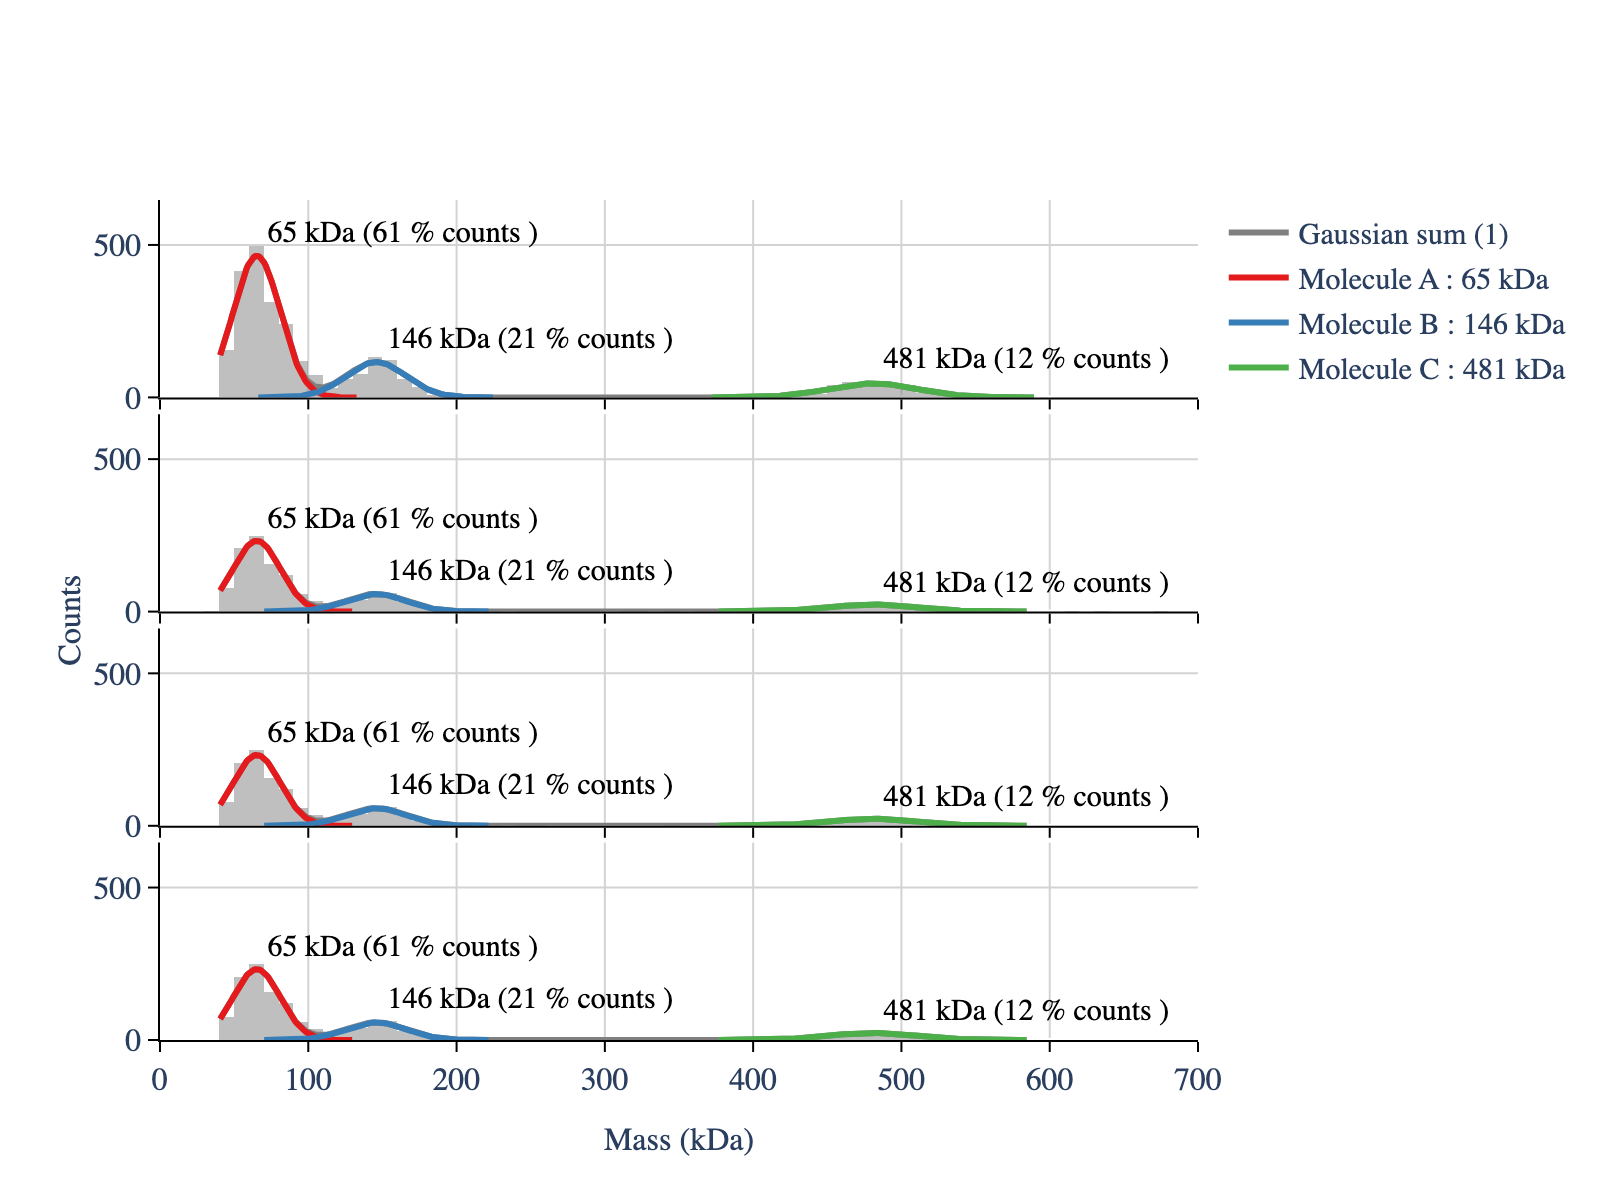

In [11]:
# The show_legend column in legends_df controls which legends are shown in the plot
legends_df['show_legend'] = False
legends_df.loc[:3, 'show_legend'] = True  # Show the first four legends

# Repeat colors for the histograms - do not use the colors from the hist_df
colors_hist = ['gray'] * len(hist_df)

# Create configuration objects
plot_config = PlotConfig(
    font_size=16,
    x_range=[0, 700]
)

layout_config = LayoutConfig(
    stacked=True,
    vertical_spacing=0.02,
    extra_padding_y_label=0.02
)

fig = plot_histograms_and_fits(mp, 
                               legends_df=legends_df,
                               colors_hist=colors_hist,
                               plot_config=plot_config,
                               layout_config=layout_config)

display_figure_static(fig)

You can also control the
 - line width
 - whether to add the fitted masses to the plot
 - whether to add the counts percentage to the plot
 - whether to add the fitted masses to the legends
 - whether to add the counts percentage to the legends

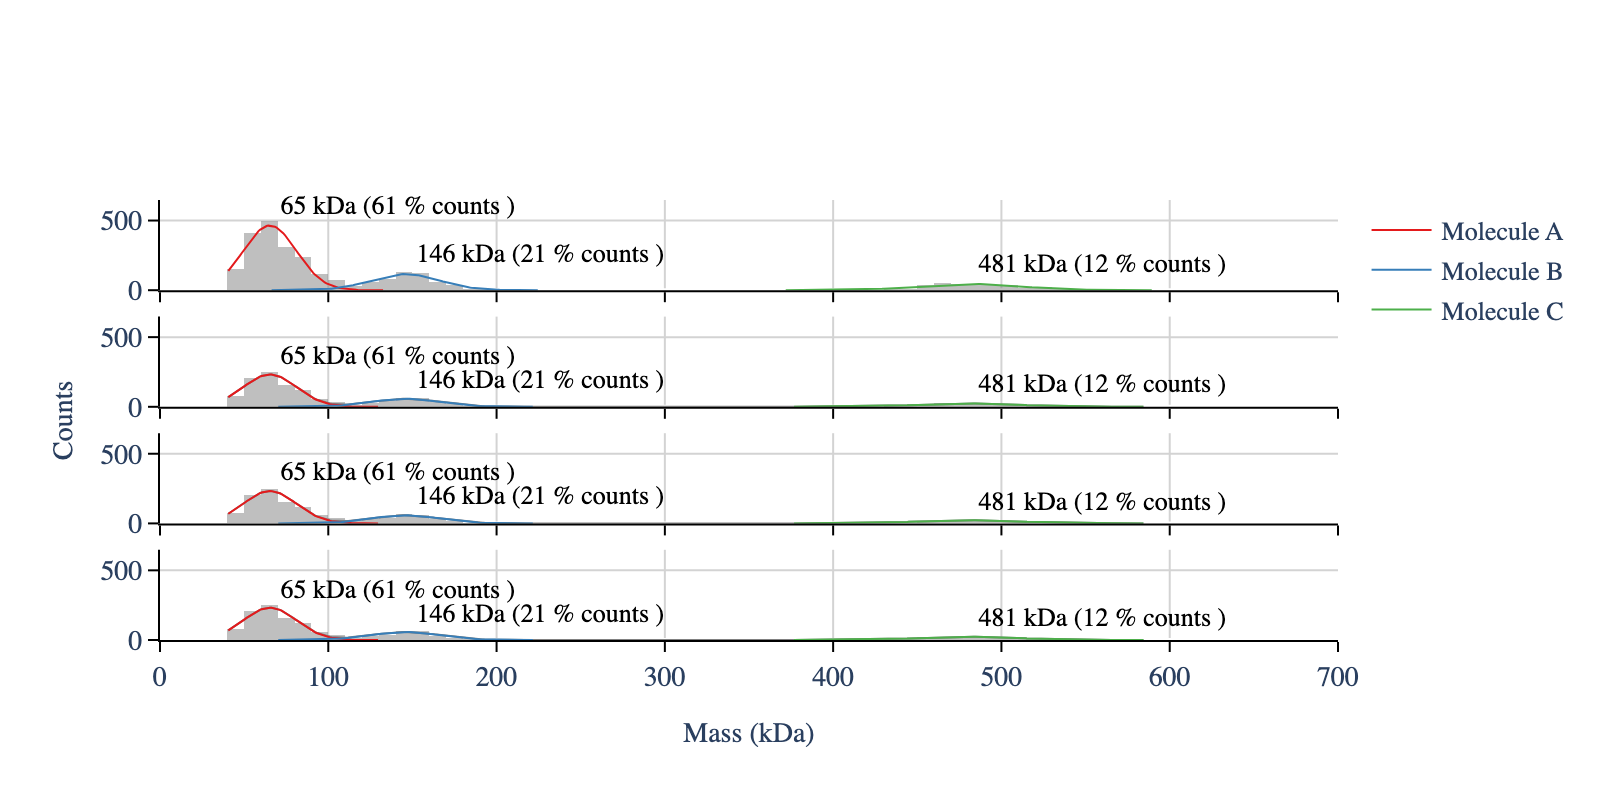

In [12]:
legends_df.loc[0, 'select'] = False # Hide the multi-gaussian trace and legend

# Create configuration objects
plot_config = PlotConfig(
    font_size=14,
    x_range=[0, 700]
)

layout_config = LayoutConfig(
    stacked=True,
    vertical_spacing=0.06,
    extra_padding_y_label=0.02
)
legend_config = LegendConfig(
    add_masses_to_legend=False,
    add_percentage_to_legend=False,
    add_labels=True,  # Add labels in the plot
    add_percentages=True,  # Add count percentages in the plot
    line_width=1
)

fig = plot_histograms_and_fits(mp, 
                               legends_df=legends_df,
                               colors_hist=colors_hist,
                               plot_config=plot_config,
                               layout_config=layout_config,
                               legend_config=legend_config)

display_figure_static(fig, width=800, height=400)